In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount("/content/gdrive")

titanic = pd.read_csv('/content/gdrive/MyDrive/데이터 분석 스터디/전처리_시각화_자료/6장/train.csv')

Mounted at /content/gdrive


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###성별에 따른 생존율을 비교

In [9]:
titanic.groupby('Sex')['Survived'].mean()
#titanic을 성별로 그룹화하고 생존여부의 평균 계산

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
titanic.groupby('Sex').agg({'Survived' : 'mean'})

,Survived
Sex,
female,0.742038
male,0.188908


###함께 승선한 부모와 자식 수(Parch)에 따른 생존율을 비교하기

In [10]:
titanic.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [15]:
titanic.groupby('Parch').agg({'Survived' : 'mean'}).sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


###객실 등급(Pclass), 성별(Sex) 컬럼 별로 titanic 내 전체 데이터의 평균값을 출력해 보기

In [16]:
# 숫자 데이터만 선택 + Sex컬럼까지 포함해주기
numeric_cols = titanic.select_dtypes(include=['number']).columns
result = numeric_cols.tolist()+['Sex']

titanic[result].groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

###항구별 생존자를 데이터 시각화로 확인해 보기

<Axes: xlabel='Embarked', ylabel='count'>

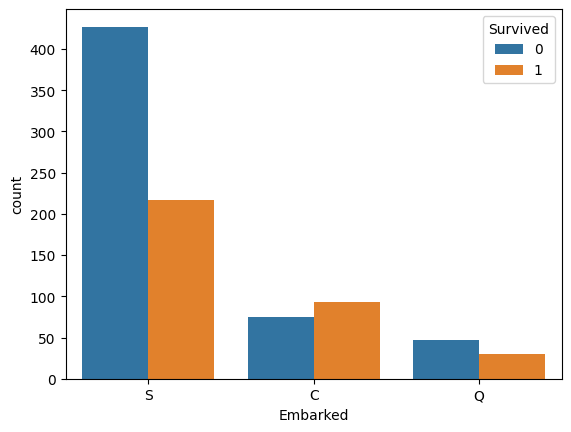

In [17]:
import seaborn as sns

sns.countplot(x='Embarked', hue='Survived', data=titanic)